In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd drive/My Drive/Trabajo de Grado 2


/content/drive/My Drive/Trabajo de Grado 2


In [5]:
ls

Backup/                 CCN_VGG16.ipynb   Pruebas/
CCN_DenseNet-169.ipynb  CCN_VGG19.ipynb   Trabajo_de_Grado_CCN.ipynb
CCN_ResNet101.ipynb     dataset/
CCN_ResNet50.ipynb      prueba_cnn.ipynb


# Importar Librerías

In [0]:
%matplotlib inline
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU

# Cargar Set de Imágenes

In [7]:
dirname = os.path.join(os.getcwd(), 'dataset')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))


leyendo imagenes de  /content/drive/My Drive/Trabajo de Grado 2/dataset/
/content/drive/My Drive/Trabajo de Grado 2/dataset/malignos 1
/content/drive/My Drive/Trabajo de Grado 2/dataset/benignos 1497
Directorios leidos: 2
Imagenes en cada directorio [1498, 1799]
suma Total de imagenes en subdirs: 3297


# Creamos las etiquetas

In [8]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad Etiquetas Creadas: ",len(labels))

lunar_cancer=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    lunar_cancer.append(name[len(name)-1])
    indice=indice+1
    
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy


Cantidad Etiquetas Creadas:  3297
0 malignos
1 benignos


# Encuentra los números únicos de la etiquetas a entrenar

In [9]:
classes = np.unique(y)
nClasses = len(classes)
print('Total Numero de Salidas : ', nClasses)
print('Clases de Salida : ', classes)

Total Numero de Salidas :  2
Clases de Salida :  [0 1]


# Creamos Sets de Entrenamiento y Test

In [10]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Forma de los datos de entrenamiento : ', train_X.shape, train_Y.shape)
print('Forma de los datos de prueba : ', test_X.shape, test_Y.shape)

plt.figure(figsize=[5,5])

Forma de los datos de entrenamiento :  (2637, 224, 224, 3) (2637,)
Forma de los datos de prueba :  (660, 224, 224, 3) (660,)


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

# Mostrar la primera imagen en Datos de entrenamiento.

Text(0.5, 1.0, 'Verdad Fundamental: 1')

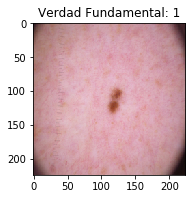

In [11]:
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Verdad Fundamental: {}".format(train_Y[0])) ## 

# Mostrar la primera imagen en los datos de entrenamiento.

Text(0.5, 1.0, 'Verdad Fundamental: 1')

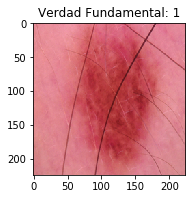

In [12]:
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Verdad Fundamental: {}".format(test_Y[0])) 

# Preprocesamos las imagenes

In [0]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Hacemos la Codificación One-Hot para la red

In [14]:
# Cambiar las etiquetas de categóricas a una codificación en caliente (one-hot encoding)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar el cambio para la etiqueta de categoría usando la codificación de un solo uso (one-hot encoding)
print('Etiqueta Original:', train_Y[0])
print('Después de la Conversión a one-hot:', train_Y_one_hot[0])


Etiqueta Original: 1
Después de la Conversión a one-hot: [0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [15]:
#Mezclar todo y crear los grupos de Entrenamiento y Pruebas
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
[ ]

print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(2109, 224, 224, 3) (528, 224, 224, 3) (2109, 2) (528, 2)


# Evaluamos con el Modelo DenseNet-121

In [0]:
from keras.applications.densenet import DenseNet121
from keras.optimizers import Adam

In [38]:
input_shape = (224,224,3)
lr = 1e-3
epochs = 50
batch_size = 32

def create_DenseNet121():  
  DenseNet121_model = DenseNet121(include_top=True, weights=None, input_tensor=None, input_shape=input_shape, pooling=None, classes=2)

  return DenseNet121_model

DenseNet121_model = create_DenseNet121()  

DenseNet121_model.compile(optimizer = Adam(lr),
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

DenseNet121_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_13 (ZeroPadding2 (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_13[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [39]:
#Entrenamos el modelo con DenseNet121
DenseNet121 = DenseNet121_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 2109 samples, validate on 528 samples
Epoch 1/50
2109/2109 [==============================] - 117s 56ms/step - loss: 0.5247 - acc: 0.7677 - val_loss: 3.5228 - val_acc: 0.5455
Epoch 2/50
2109/2109 [==============================] - 62s 29ms/step - loss: 0.4415 - acc: 0.7824 - val_loss: 1.5486 - val_acc: 0.4924
Epoch 3/50
2109/2109 [==============================] - 62s 29ms/step - loss: 0.4091 - acc: 0.7980 - val_loss: 4.7398 - val_acc: 0.5208
Epoch 4/50
2109/2109 [==============================] - 62s 29ms/step - loss: 0.4355 - acc: 0.7762 - val_loss: 0.5381 - val_acc: 0.7689
Epoch 5/50
2109/2109 [==============================] - 62s 29ms/step - loss: 0.4130 - acc: 0.7923 - val_loss: 0.6135 - val_acc: 0.6856
Epoch 6/50
2109/2109 [==============================] - 62s 29ms/step - loss: 0.4245 - acc: 0.7871 - val_loss: 2.3094 - val_acc: 0.4773
Epoch 7/50
2109/2109 [==============================] - 62s 29ms/step - loss: 0.4119 - acc: 0.7985 - val_loss: 1.6426 - val_acc: 0.4792


660/660 [==============================] - 6s 9ms/step
Perdida(loss) de Prueba: 1.2865916541128448
Exactitud(accuracy) de Prueba: 0.7984848488460887


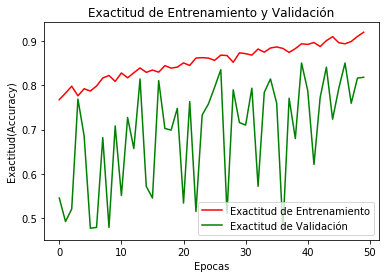

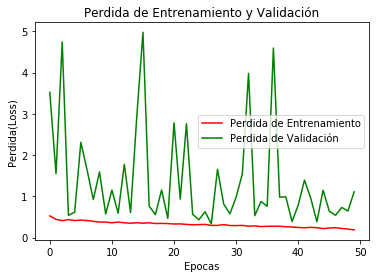

((660,), (660,))

In [44]:
######  Probamos y Validamos la Red DenseNet121
test_eval_DenseNet121 = DenseNet121_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Perdida(loss) de Prueba:', test_eval_DenseNet121[0])
print('Exactitud(accuracy) de Prueba:', test_eval_DenseNet121[1])

accuracy = DenseNet121.history['acc']
val_accuracy = DenseNet121.history['val_acc']
loss = DenseNet121.history['loss']
val_loss = DenseNet121.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Exactitud de Entrenamiento')
plt.plot(epochs, val_accuracy, 'g', label='Exactitud de Validación')
plt.title('Exactitud de Entrenamiento y Validación')
plt.xlabel('Epocas')
plt.ylabel('Exactitud(Accuracy)')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Perdida de Entrenamiento')
plt.plot(epochs, val_loss, 'g', label='Perdida de Validación')
plt.title('Perdida de Entrenamiento y Validación')
plt.xlabel('Epocas')
plt.ylabel('Perdida(Loss)')
plt.legend()
plt.show()

predicted_classes2 = DenseNet121_model.predict(test_X)

predicted_classes=[]
for predicted_DenseNet121 in predicted_classes2:
    predicted_classes.append(predicted_DenseNet121.tolist().index(max(predicted_DenseNet121)))
predicted_classes=np.array(predicted_classes)

predicted_classes.shape, test_Y.shape

Encontraron 527 Etiquetas Correctas


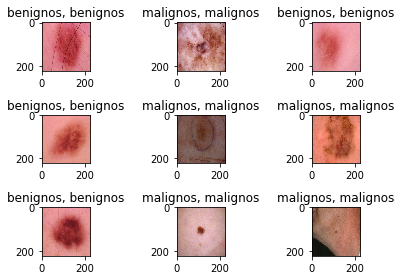

In [45]:
correct = np.where(predicted_classes==test_Y)[0]
print("Encontraron %d Etiquetas Correctas" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(224,224,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(lunar_cancer[predicted_classes[correct]],
                                                    lunar_cancer[test_Y[correct]]))

    plt.tight_layout()

Encontraron 133 Etiquetas Incorrectas


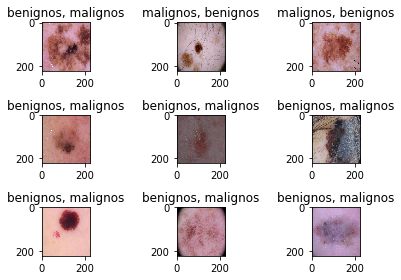

In [46]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Encontraron %d Etiquetas Incorrectas" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(224,224,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(lunar_cancer[predicted_classes[incorrect]],
                                                    lunar_cancer[test_Y[incorrect]]))
    plt.tight_layout()

In [47]:
target_names = ["Clase {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Clase 0       0.85      0.72      0.78       321
     Clase 1       0.77      0.88      0.82       339

    accuracy                           0.80       660
   macro avg       0.81      0.80      0.80       660
weighted avg       0.80      0.80      0.80       660

